In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [2]:
# Helper function to plot two images side-by-side
def plot_image(image_1, image_2,title_1="Orignal", title_2="New Image"):
    plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    plt.imshow(image_1,cmap="gray")
    plt.title(title_1)
    plt.subplot(1, 2, 2)
    plt.imshow(image_2,cmap="gray")
    plt.title(title_2)
    plt.show()

# Helper function to plot two histograms side-by-side.
def plot_hist(old_image, new_image,title_old="Orignal", title_new="New Image"):
    intensity_values=np.array([x for x in range(256)])
    plt.subplot(1, 2, 1)
    plt.bar(intensity_values, cv2.calcHist([old_image],[0],None,[256],[0,256])[:,0],width = 5)
    plt.title(title_old)
    plt.xlabel('intensity')
    plt.subplot(1, 2, 2)
    plt.bar(intensity_values, cv2.calcHist([new_image],[0],None,[256],[0,256])[:,0],width = 5)
    plt.title(title_new)
    plt.xlabel('intensity')
    plt.show()

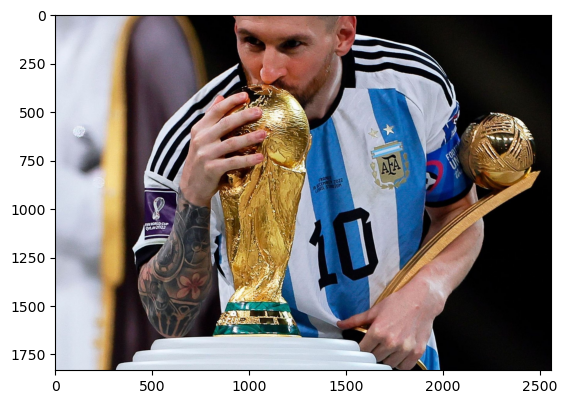

<Figure size 1000x1000 with 0 Axes>

In [3]:
image = cv2.imread("messi.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.figure(figsize=(10,10))
plt.show()

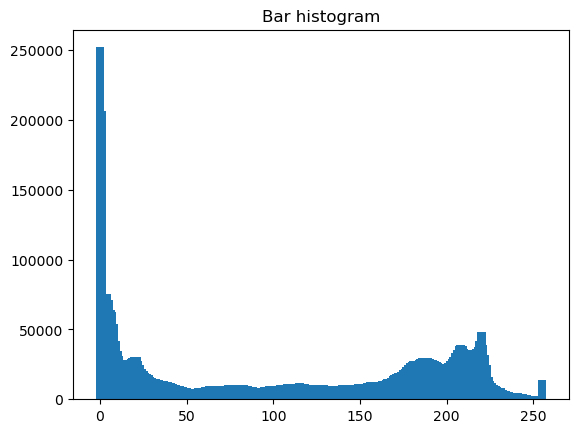

AttributeError: 'NoneType' object has no attribute 'calcHist'

In [4]:
hist = cv2.calcHist([image],[0], None, [256], [0,256])
intensity_values = np.array([x for x in range(hist.shape[0])])
plt.bar(intensity_values, hist[:,0], width = 5)
plt.title("Bar histogram")
plt.show()

In [ ]:
color = ('blue','green','red')
for i,col in enumerate(color):
    histr = cv2.calcHist([image],[i],None,[256],[0,256])
    plt.plot(intensity_values,histr,color = col,label=col+" channel")
    plt.xlim([0,256])
plt.legend()
plt.title("Histogram Channels")
plt.show()

In [ ]:
alpha = 1    # Simple contrast control
beta = 100   # Simple brightness control   
new_image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
plot_image(image, new_image, title_1 = "Orignal", title_2 = "Brightness Control")
plot_hist(image, new_image, "Orignal", "Brightness Control")

In [ ]:
for i,col in enumerate(color):
    histr = cv2.calcHist([new_image],[i],None,[256],[0,256])
    plt.plot(intensity_values,histr,color = col,label=col+" channel")
    plt.xlim([0,256])
plt.legend()
plt.title("Histogram Channels")
plt.show()

In [ ]:
alpha = 2  # Simple contrast control
beta = 0   # Simple brightness control 
new_image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
plot_image(image,new_image,"Original","Contrast Control")
plot_hist(image,new_image,"Original","Contrast Control")

In [ ]:
for i,col in enumerate(color):
    histr = cv2.calcHist([new_image],[i],None,[256],[0,256])
    plt.plot(intensity_values,histr,color = col,label=col+" channel")
    plt.xlim([0,256])
plt.legend()
plt.title("Histogram Channels")
plt.show()